## Import Needed Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report 
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


## Read Data 

### train_data

In [2]:
data_dir = r'C:\Users\NLN\Desktop\FYP Project\Dataset'
target_folder='train'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)  

f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
train_df = pd.concat([f_series, l_series], axis=1)

In [3]:
data_dir = r'C:\Users\NLN\Desktop\FYP Project\Dataset'

target_folder='test'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)  

f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
test_df = pd.concat([f_series, l_series], axis=1)

In [4]:
train_df

,filepath,labels
0,C:\Users\NLN\Desktop\FYP Project\Dataset\train...,MildDemented
1,C:\Users\NLN\Desktop\FYP Project\Dataset\train...,MildDemented
2,C:\Users\NLN\Desktop\FYP Project\Dataset\train...,MildDemented
3,C:\Users\NLN\Desktop\FYP Project\Dataset\train...,MildDemented
4,C:\Users\NLN\Desktop\FYP Project\Dataset\train...,MildDemented
...,...,...
33979,C:\Users\NLN\Desktop\FYP Project\Dataset\train...,VeryMildDemented
33980,C:\Users\NLN\Desktop\FYP Project\Dataset\train...,VeryMildDemented
33981,C:\Users\NLN\Desktop\FYP Project\Dataset\train...,VeryMildDemented
33982,C:\Users\NLN\Desktop\FYP Project\Dataset\train...,VeryMildDemented


In [5]:
test_df

,filepath,labels
0,C:\Users\NLN\Desktop\FYP Project\Dataset\test\...,MildDemented
1,C:\Users\NLN\Desktop\FYP Project\Dataset\test\...,MildDemented
2,C:\Users\NLN\Desktop\FYP Project\Dataset\test\...,MildDemented
3,C:\Users\NLN\Desktop\FYP Project\Dataset\test\...,MildDemented
4,C:\Users\NLN\Desktop\FYP Project\Dataset\test\...,MildDemented
...,...,...
6395,C:\Users\NLN\Desktop\FYP Project\Dataset\test\...,VeryMildDemented
6396,C:\Users\NLN\Desktop\FYP Project\Dataset\test\...,VeryMildDemented
6397,C:\Users\NLN\Desktop\FYP Project\Dataset\test\...,VeryMildDemented
6398,C:\Users\NLN\Desktop\FYP Project\Dataset\test\...,VeryMildDemented


## Visulization

In [6]:
count_train=train_df["labels"].value_counts()
count_train

labels
NonDemented         9600
MildDemented        8960
VeryMildDemented    8960
ModerateDemented    6464
Name: count, dtype: int64

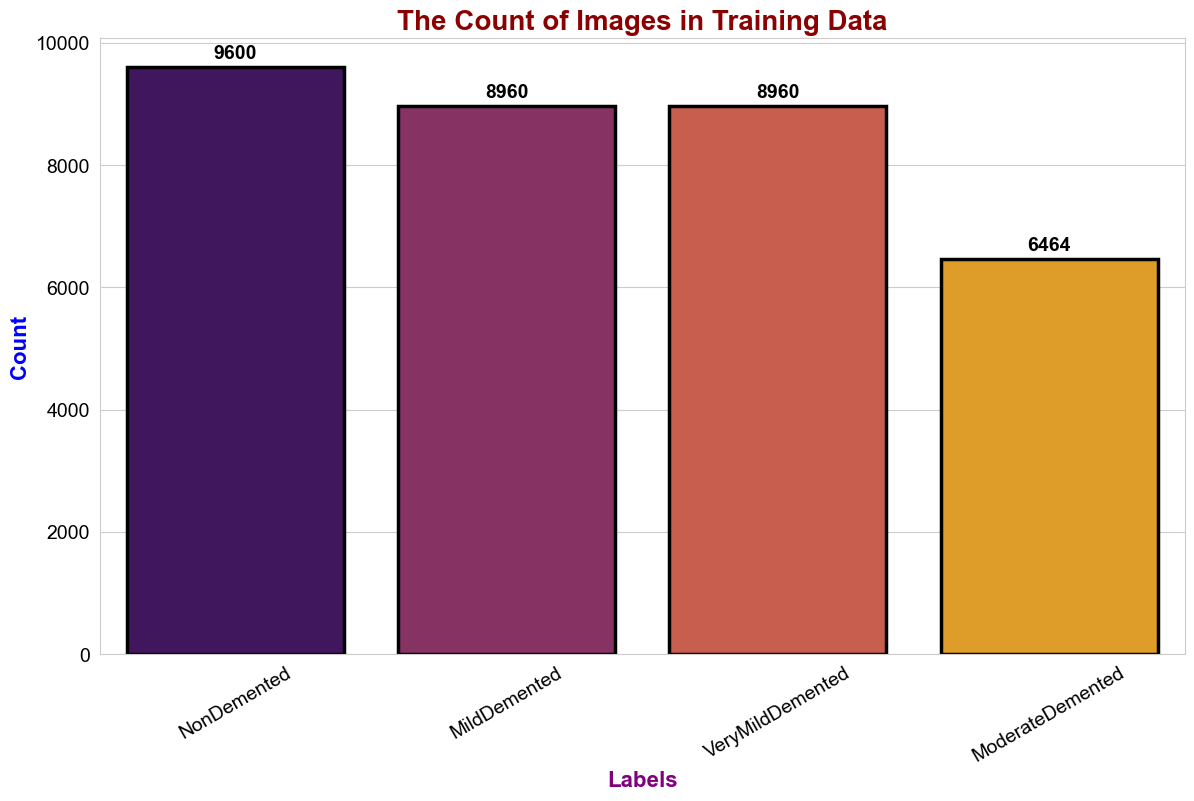

In [7]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

ax = sns.barplot(x=count_train.index, y=count_train.values, palette="inferno", edgecolor="black", linewidth=2.5)

plt.title('The Count of Images in Training Data', fontsize=20, fontweight='bold', color='darkred')
plt.xlabel('Labels', fontsize=16, fontweight='bold', color='purple')
plt.ylabel('Count', fontsize=16, fontweight='bold', color='blue')

plt.xticks(rotation=30, fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=14, fontweight='bold', color='black',
                xytext=(0, 10), textcoords='offset points')

plt.show()

In [8]:
count_test=test_df["labels"].value_counts()
count_test

labels
NonDemented         3200
VeryMildDemented    2240
MildDemented         896
ModerateDemented      64
Name: count, dtype: int64

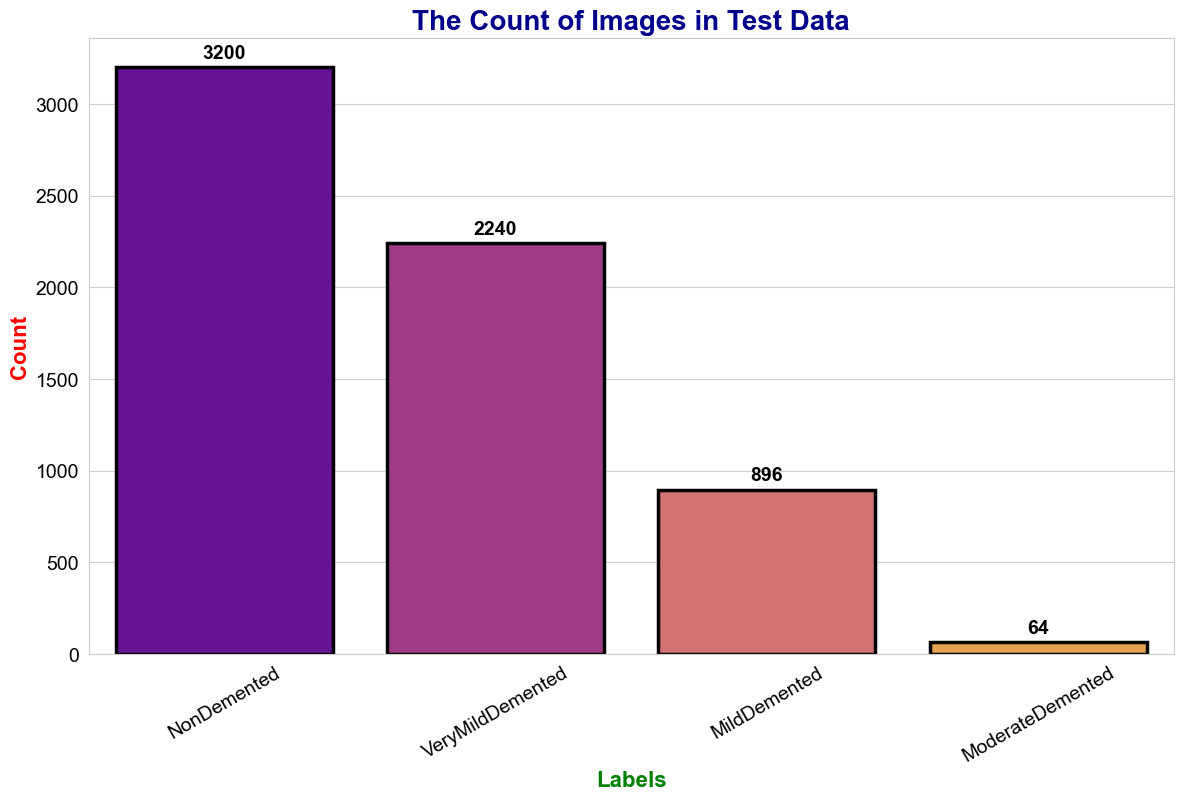

In [9]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

ax = sns.barplot(x=count_test.index, y=count_test.values, palette="plasma", edgecolor="black", linewidth=2.5)

plt.title('The Count of Images in Test Data', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Labels', fontsize=16, fontweight='bold', color='green')
plt.ylabel('Count', fontsize=16, fontweight='bold', color='red')

plt.xticks(rotation=30, fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=14, fontweight='bold', color='black',
                xytext=(0, 10), textcoords='offset points')
plt.show()

## Split Data

In [10]:
strat=train_df['labels']
train_df,valid_df=train_test_split(train_df,test_size=0.2,random_state=42,stratify=strat)

In [11]:
print(train_df.shape)
print(valid_df.shape)

(27187, 2)
(6797, 2)


## Data Augmentation

In [12]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
gen = ImageDataGenerator()

train_gen = gen.flow_from_dataframe( train_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = gen.flow_from_dataframe( valid_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = gen.flow_from_dataframe( test_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 27187 validated image filenames belonging to 4 classes.
Found 6797 validated image filenames belonging to 4 classes.
Found 6400 validated image filenames belonging to 4 classes.


## Sample from data

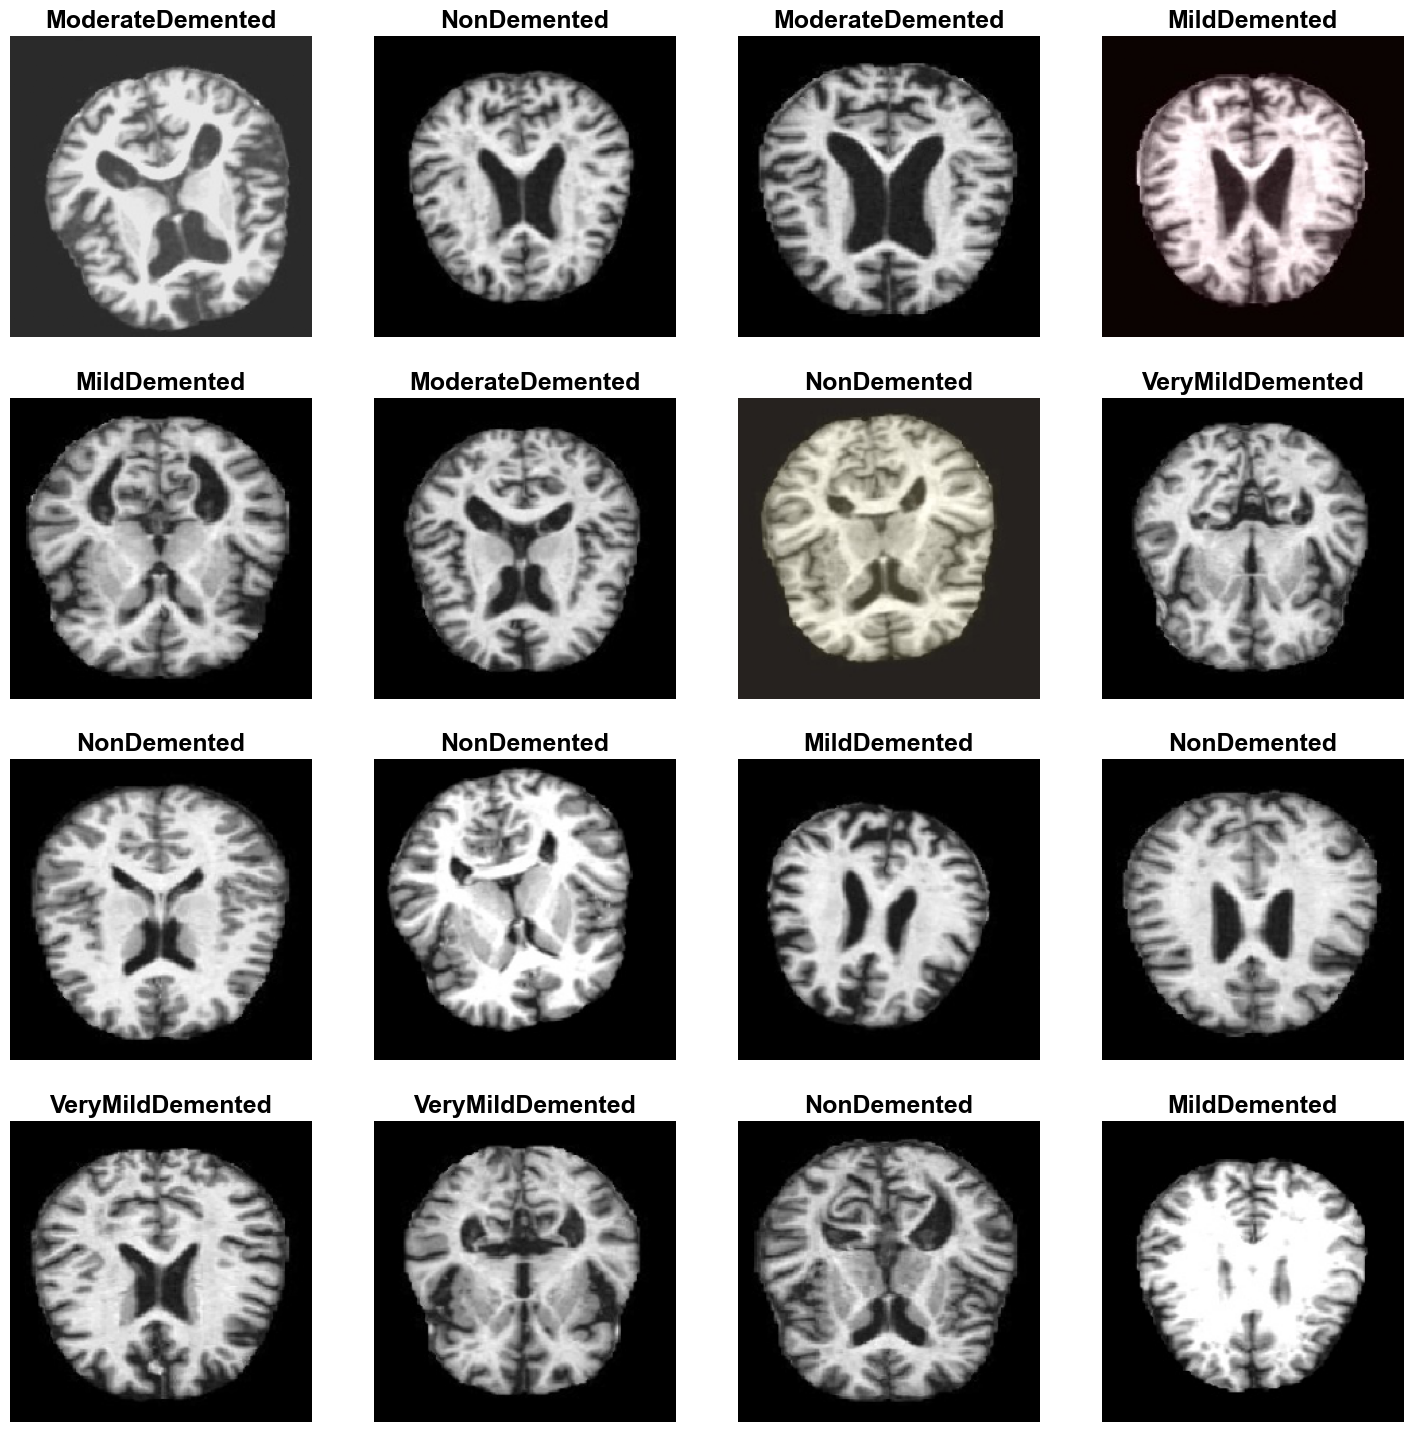

In [13]:
g_dict = train_gen.class_indices    
classes = list(g_dict.keys())      
images, labels = next(train_gen)     

class_colors = {
    'No Impairment': 'green',
    'Very Mild Impairment': 'red',
    'Mild Impairment': 'blue',
    'Moderate Impairment': 'purple'
}

plt.figure(figsize=(18, 18))
sns.set_style("whitegrid")

for i in range(16):
    plt.subplot(4, 4, i + 1)
    
    image = images[i] / 255      
    plt.imshow(image, cmap='gray')
  
    index = np.argmax(labels[i])  
    class_name = classes[index]   
    title_color = class_colors.get(class_name, 'black')

    plt.title(class_name, color=title_color, fontsize=18, fontweight='bold')
    
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    
    plt.axis('off')  

plt.show()

## Build Model

In [14]:
base_model=keras.applications.EfficientNetV2B0(include_top=False,
    weights="imagenet",
    input_shape=(224,224,3))
model=Sequential([
    base_model,
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dense(4,activation='softmax')
])
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,056,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,009,300 (83.96 MB)

 Trainable params: 21,948,692 (83.73 MB)

 Non-trainable params: 60,608 (236.75 KB)

## Training

In [16]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=model.fit(train_gen,epochs=10,validation_data=valid_gen,shuffle=False,
                  callbacks=[early_stopping],validation_steps= None)

Epoch 1/10
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 3553s 2s/step - accuracy: 0.6393 - loss: 0.9015 - val_accuracy: 0.9192 - val_loss: 0.2152
Epoch 2/10
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 3526s 2s/step - accuracy: 0.9419 - loss: 0.1571 - val_accuracy: 0.9743 - val_loss: 0.0715
Epoch 3/10
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 3505s 2s/step - accuracy: 0.9782 - loss: 0.0630 - val_accuracy: 0.9807 - val_loss: 0.0621
Epoch 4/10
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 3510s 2s/step - accuracy: 0.9863 - loss: 0.0413 - val_accuracy: 0.9898 - val_loss: 0.0301
Epoch 5/10
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 3490s 2s/step - accuracy: 0.9910 - loss: 0.0265 - val_accuracy: 0.9841 - val_loss: 0.0592
Epoch 6/10
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 3497s 2s/step - accuracy: 0.9930 - loss: 0.0223 - val_accuracy: 0.9879 - val_loss: 0.0417
Epoch 7/10
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 4585s 3s/step - accuracy: 0.9933 - loss: 0.0193 - val_accuracy: 0.9910 - val_loss: 0.0311


## compare loss and accuracy

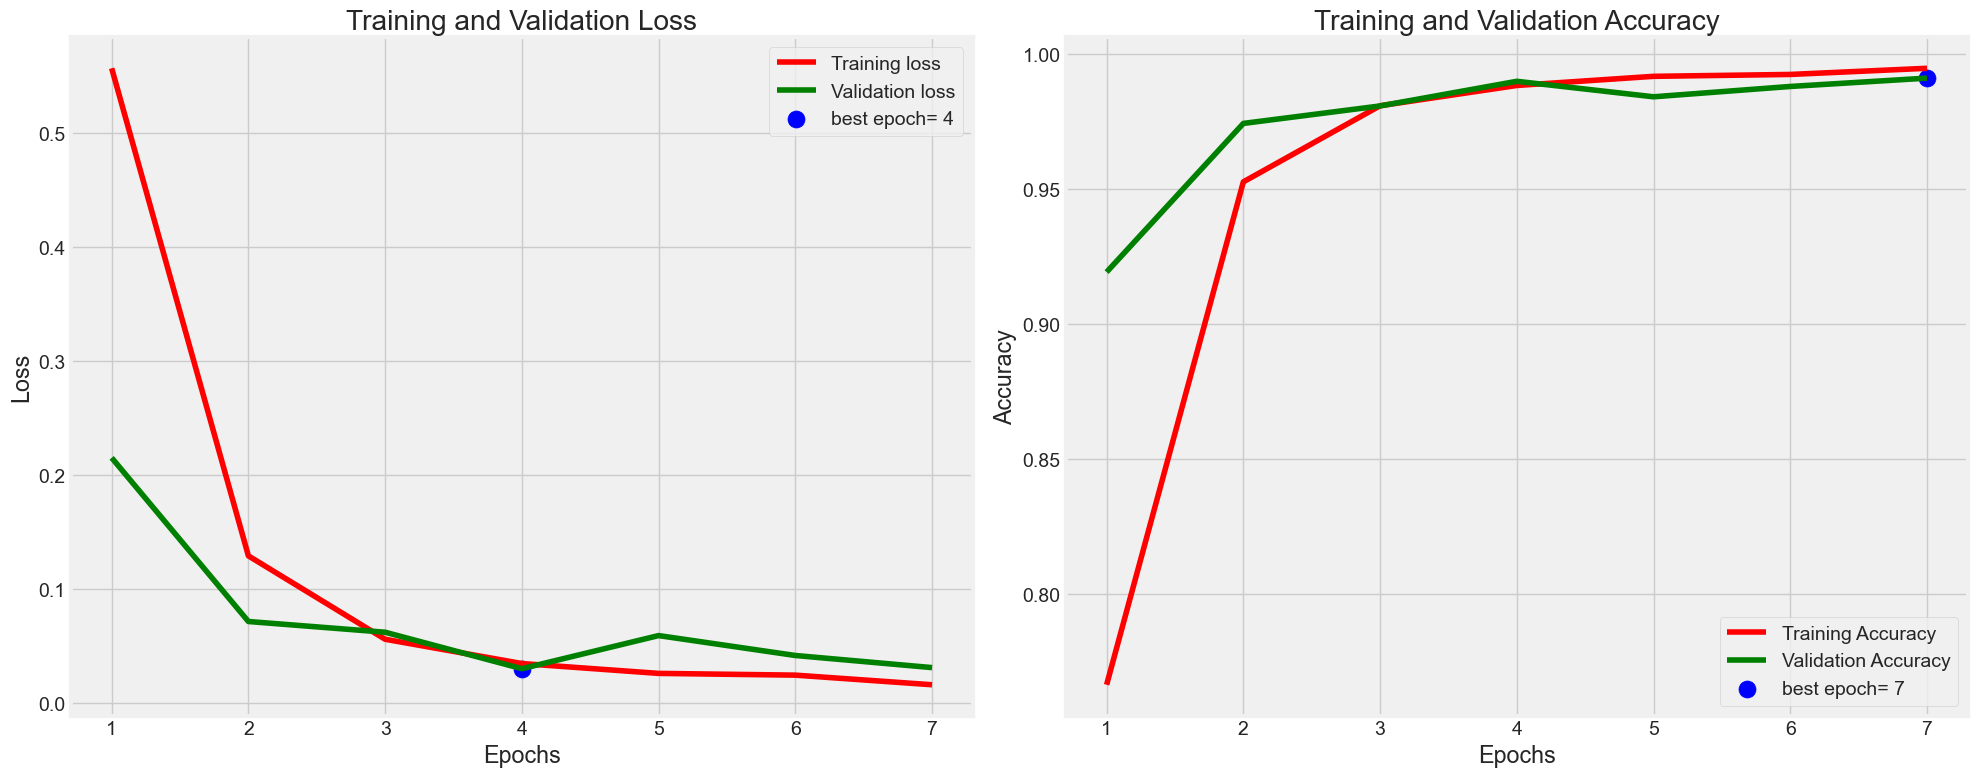

In [17]:
tr_acc = history.history['accuracy']  
tr_loss = history.history['loss']  
val_acc = history.history['val_accuracy']  
val_loss = history.history['val_loss']  

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Evalution

In [18]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

80/80 ━━━━━━━━━━━━━━━━━━━━ 51s 629ms/step - accuracy: 0.9995 - loss: 0.0027
80/80 ━━━━━━━━━━━━━━━━━━━━ 50s 629ms/step - accuracy: 0.9871 - loss: 0.0392
80/80 ━━━━━━━━━━━━━━━━━━━━ 51s 639ms/step - accuracy: 0.9730 - loss: 0.0942
Train Loss:  0.0055344244465231895
Train Accuracy:  0.9984375238418579
--------------------
Valid Loss:  0.04167209565639496
Valid Accuracy:  0.9859374761581421
--------------------
Test Loss:  0.05498524382710457
Test Accuracy:  0.984375


In [19]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

400/400 ━━━━━━━━━━━━━━━━━━━━ 259s 627ms/step


## Confusion Matrix

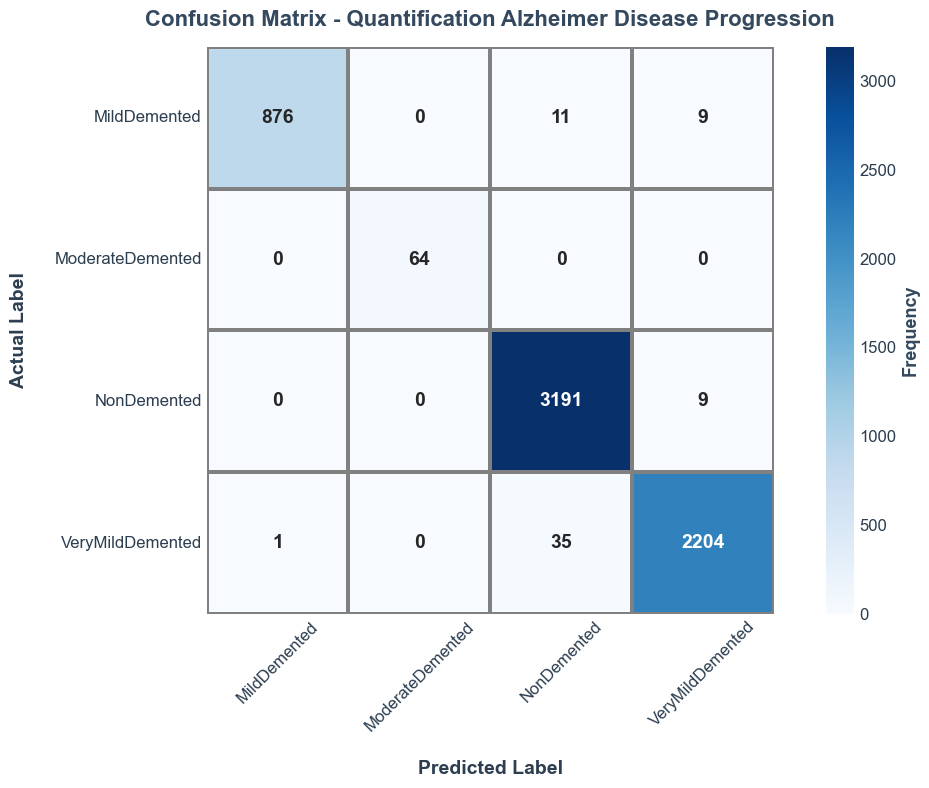

In [20]:
cm = confusion_matrix(test_gen.classes, y_pred)
labels = list(test_gen.class_indices.keys())

plt.figure(figsize=(12, 7), facecolor="white")

ax = sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, 
                 cmap="Blues", linewidths=1.5, linecolor="gray", square=True, 
                 cbar=True, annot_kws={"size": 14, "weight": "bold"})

plt.xlabel("\nPredicted Label", fontsize=14, fontweight="bold", color="#2C3E50")
plt.ylabel("Actual Label\n", fontsize=14, fontweight="bold", color="#2C3E50")
plt.title("Confusion Matrix - Quantification Alzheimer Disease Progression", 
          fontsize=16, fontweight="bold", color="#34495E", pad=15)

plt.xticks(rotation=45, fontsize=12, color="#2C3E50")
plt.yticks(fontsize=12, color="#2C3E50")  

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12, colors="#2C3E50")
cbar.set_label("Frequency", fontsize=13, fontweight="bold", color="#34495E")
plt.show()

## Classification Report

In [21]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                  precision    recall  f1-score   support

    MildDemented       1.00      0.98      0.99       896
ModerateDemented       1.00      1.00      1.00        64
     NonDemented       0.99      1.00      0.99      3200
VeryMildDemented       0.99      0.98      0.99      2240

        accuracy                           0.99      6400
       macro avg       0.99      0.99      0.99      6400
    weighted avg       0.99      0.99      0.99      6400



In [22]:
model.save('Quantification_Alzheimer_Disease_Progression.h5')

In [23]:
model = load_model('Quantification_Alzheimer_Disease_Progression.h5')

In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'C:\\Users\\NLN\\Desktop\\FYP Project\\Dataset\\test\\NonDemented\\nonDem1544.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [27]:
prediction = model.predict(img_array)
class_index = np.argmax(prediction)
print(f'Predicted Class: {class_index}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted Class: 0


In [30]:
img_path = 'C:\\Users\\NLN\\Desktop\\FYP Project\\Dataset\\test\\VeryMildDemented\\27 (9).jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
#img_array /= 255.0
prediction = model.predict(img_array)
class_index = np.argmax(prediction)
print(f'Predicted Class: {class_index}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted Class: 3
